\##Question 1 - CodeRunner: Regression Rumble

Gradient Decent algorithm is used to optimise our model parameters.

The main idea is that we propagate opposite the direction of the gradient of the cost function at a given hyper parameter w or b.

To understand better, let us get our hands dirty! Below is the code implemented for the linear regression algorithm.

* We generate a regression data using the skikit_learns inbuilt library.
* We generate random weight matrices using the np.random.randn function
* Apply the GD Algorithm
 * Calculate the output of the model.
 * Calculate the error. (Used in the MSE Cost function)
 * Compute the gradient of the Cost function wrt our hyperparameter.
 * Update theta.

Have a look at the code below and fill in the necessary blanks "..."

Note:- Use the Mean Square error as your cost function given as:

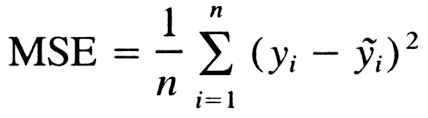

ybar is the predicted output.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import math
# sklearn.datasets.make_regression is a function in scikit-learn that generates
# a random regression dataset with specified parameters, such as the number of
# samples, number of features, and level of noise.

X, y = make_regression(n_samples=100, n_features=1, noise=10)
x_train = X.T # shape = (n_features,n_samples)
y_train = np.reshape(y - np.mean(y),(1,100))
# print(x_train)
# print(x_train.shape)

In [27]:
def gradient_descent(X, y, learning_rate, num_iterations):
    # Initialize parameter theta (our weight matrix)
    #Use the np.random.randn function for the same.
    theta = np.random.randn(1,1)

    m = np.shape(y)[1]
    cost_history = []

    for i in range(num_iterations):
        # Calculate predicted values:
        z = np.dot(theta.T,X)
        a = z # Linear activation
        predictions = a

        # Calculate the error: use the mse function
        error = a - y

        # Calculate the gradients: 1/m * X.T * error
        gradients = np.dot(error,X.T)*2/m

        # Update parameters: Apply the GD algorithm
        theta -= learning_rate*gradients

        # Calculate the cost function: MSE
        cost = np.sum(error**2)/m
        cost_history.append(cost)
        # print("Iteration",(i+1),"completed! cost =",cost)
    print("Training complete!")
    return theta, cost_history



In [43]:
# Set the learning rate and number of iterations
learning_rate = 0.04
num_iterations = 150

# Call the gradient_descent function and store the results
theta, cost_history = gradient_descent(x_train,y_train,learning_rate,num_iterations)

Training complete!


The dataset is fairly straightforward and hence no osciallations occur even for large learning rates, the learning rate has been kept purposely small so that it takes more iterations to achieve the minimum cost. This is done for aesthetic purposes only to make the graph look better, otherwise the functionality does not really change for a large learning rate like 0.1 and small number of iterations (10)

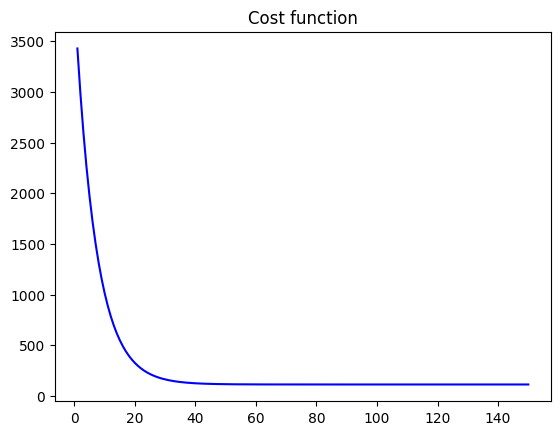

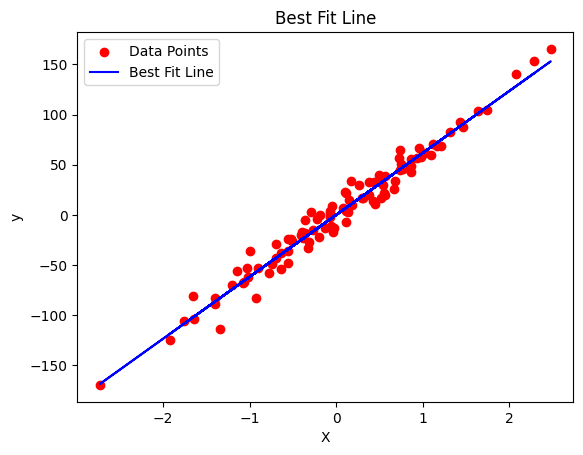

In [44]:
# Plot the cost function over iterations
plt.plot(np.arange(num_iterations)+1,cost_history,color='blue')
plt.title('Cost function')
plt.show()
print()
# Plot the best fit line
plt.scatter(X, y, color='red', label='Data Points')
plt.plot(X, np.dot(X, theta), color='blue', label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

##Question 2 - CodeRunner: Regression Rumble II

The Logistic Regression algorithm is similar to Linear Regression minus the introdiction of a sigmoid activation function.

We also use the Binary Cross Entropy Cost function istead of MSE.

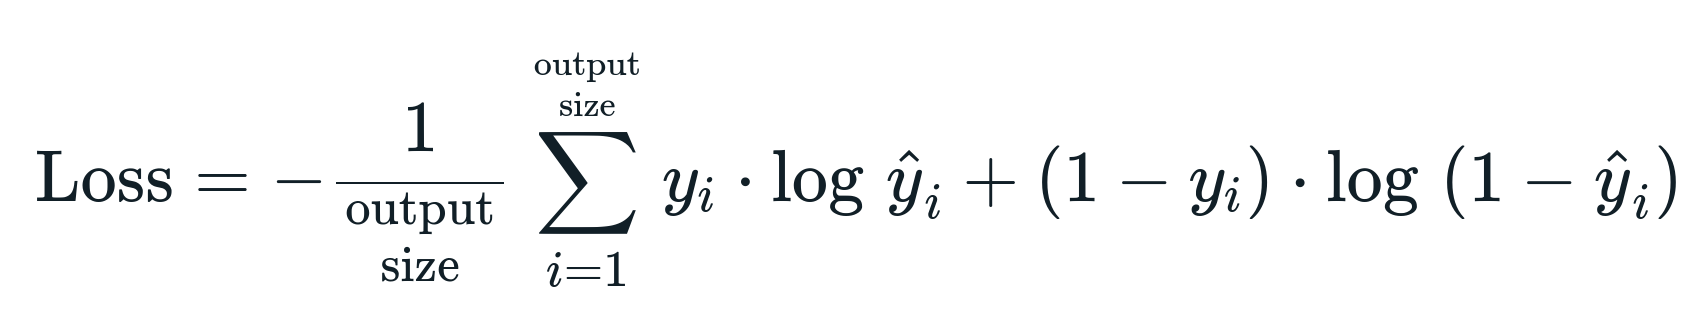


In [69]:
# Generate random classification data using scikit-learn
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
print(X.shape)
x_train = X.T
print(y.shape)
y_train = np.reshape(y + np.min(y),(1,100)) # Normalising the y values around its mean to make it easier to train when using sigmoid

(100, 2)
(100,)


n represents number of inputs to a neuron (also the number of weights as a result) and m represents the number of training samples

By experimentation it was found that for learning_rate > 0.45 there was oscillations present in the cost function hence we need to pick a sufficiently small learning_rate

Increasing number of iterations does not seem to be rectifying the accuracy of 99.5% measured over the 100 red and 100 blue points. 100 is as good as 1000 for the set of data currently stored in the notebook.

Training complete


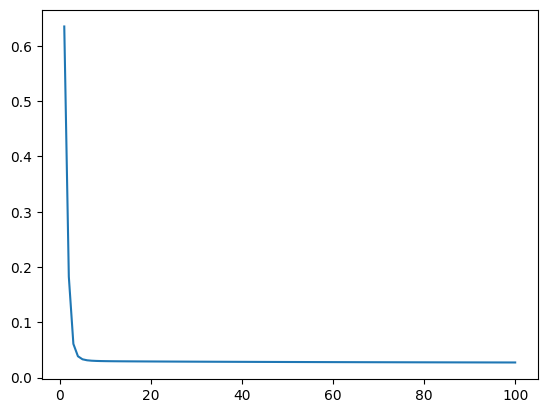

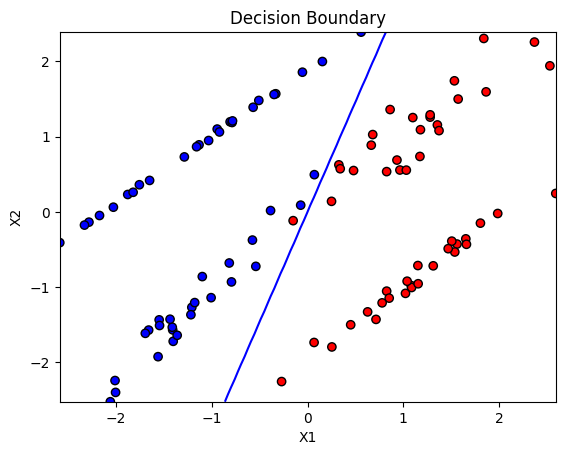

In [70]:
def sigmoid(z):
    # Sigmoid function
    return 1/(1+(1/np.exp(z)))

def logistic_regression(X, y, learning_rate, num_iterations):
    # Initialize parameters: theta

    n = np.shape(X)[0]
    m = np.shape(y)[1]
    cost_history = []

    theta = np.full((n,1),0.1,dtype='float64')
    for i in range(num_iterations):
        # Calculate predicted probabilities using the sigmoid function.
        z = np.dot(theta.T,X)
        a = sigmoid(z)
        predictions = a

        # Calculate the error: y_pred - y
        error = a - y

        # Calculate the gradients:
        gradients = np.dot(X,error.T)

        # Update parameters:
        theta -= learning_rate*gradients

        # Calculate the cost function: log loss
        cost = -np.sum(y*np.log(a) + (1-y)*np.log(1-a))/m
        cost_history.append(cost)
        # print("Iteration",i+1," complete! Cost =",cost)
    print("Training complete")
    # print(theta)
    return theta, cost_history

# Set the learning rate and number of iterations
learning_rate = 0.2
num_iterations = 100

# Call the logistic_regression function and store the results
theta, cost_history = logistic_regression(x_train, y_train, learning_rate, num_iterations)

# Plot the cost function over iterations

plt.plot(np.arange(num_iterations)+1,cost_history)
plt.show()
print()

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = sigmoid(np.dot(grid, theta)).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0.5], colors='blue')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')
plt.show()